# Exploratory Data Analysis

In [61]:
import os
from collections import Counter

import numpy as np

import matplotlib.pyplot as plt

import music21
import warnings
warnings.filterwarnings('ignore')

## Understanding the Data

In [2]:
# Read midi files
def idyInstruments(file):
    notes = []
    
    # Parsing a midi file
    data = music21.converter.parse(file)
    
    # Grouping based on different instruments
    groupData = music21.instrument.partitionByInstrument(data)
    
    for part in groupData.parts:
        print(str(part))

In [3]:
idyInstruments('../dataset/50000-MIDI-FILES/2009 MIDI/007.mid')

<music21.stream.Part Fretless Bass>
<music21.stream.Part Vibraphone>
<music21.stream.Part Electric Guitar>
<music21.stream.Part>
<music21.stream.Part Alto Saxophone>
<music21.stream.Part Tenor Saxophone>
<music21.stream.Part Trombone>
<music21.stream.Part Horn>
<music21.stream.Part StringInstrument>
<music21.stream.Part Dulcimer>
<music21.stream.Part Percussion>
<music21.stream.Part Trumpet>
<music21.stream.Part Baritone Saxophone>
<music21.stream.Part Brass>
<music21.stream.Part Sampler>


We can see that we can group and extract different tracks for different instruments as Identified by `music21`

In [48]:
def readMIDIFile(file):
    notes = []

    try:
        # Parsing a midi file
        data = music21.converter.parse(file)
    except:
        print(file)
        return []
    
    # Grouping based on different instruments
    groupData = music21.instrument.partitionByInstrument(data)
    
    if groupData:
        for part in groupData.parts:
            if 'Piano' in str(part):
                notesParse = part.recurse()

                # Finding whether a particular element is note or a chord
                for element in notesParse:

                    if isinstance(element, music21.note.Note):
                        # print(str(element.pitch))
                        notes.append(str(element.pitch))

                    elif isinstance(element, music21.chord.Chord):
                        notes.append('.'.join(str(n) for n in element.normalOrder))
                        # print(element.normalOrder)
            #         if 'Flute' in str(part):
            #             notesParse = part.recurse()

            #             # Finding whether a particular element is note or a chord
            #             for element in notesParse:
            #                 print(element)
    
                    
    return np.array(notes)

In [49]:
rslt = readMIDIFile('../dataset/50000-MIDI-FILES/2009 MIDI/(Your Love Keeps Lifting Me) Higher and Higher MM GM.mid')

In [50]:
rslt.shape

(436,)

In [97]:
! ls ../dataset/50000-MIDI-FILES/

2009 MIDI          Dance              LDS                Stadium
Anime              Dance_Techno       LDS_               TVThemes
Anthems            DisneyThemes       Misc               Television
Attilas            Drums              Motown             UNSORTED MIDI
Broadway           FilmThemes         Movie_Soundtracks  Various Artists
By ARTIST          Freeze Files       Music MIX          VideoGameThemes
Christian          HitSongs           NationalAnthems    Video_Games
Christmas          Hymns              Oldies_but_Goodies chinese
ClassicRock        INTERNET           Pop_and_Top40      japanese
Classical          Jazz               QUALITY MIDI
CountryMusic       Karaoke files      RapMusic


In [24]:
! ls ../../../../Downloads/gurupuja.mid

../../../../Downloads/gurupuja.mid


In [51]:
# Read 500 files from 2009 MIDI directory
path = '../dataset/50000-MIDI-FILES/2009 MIDI/'
subDir = [subdir for subdir in os.listdir(path)]

notes = []
count = 0
for file in os.listdir(path):
    if file.endswith(".mid"):
        if count < 500:
            rslt = readMIDIFile(path+file)
            if rslt != []:
                notes.append(rslt)
                count+=1
            print("Count : ",count)
        else:
            break

# notes = np.array([readMIDIFile(path+"2009 MIDI"+"/"+file,i) for i,file in enumerate(os.listdir(path)) if file.endswith(".mid") and i<500])

Count :  0
Count :  1
Count :  1
Count :  2
Count :  3
Count :  3
Count :  4
Count :  5
Count :  6
Count :  6
Count :  7
Count :  8
Count :  9
Count :  10
Count :  10
Count :  11
Count :  11
Count :  11
Count :  12
Count :  13
Count :  13
Count :  13
Count :  14
Count :  15
Count :  16
Count :  17
Count :  18
Count :  18
Count :  19
Count :  20
Count :  20
Count :  21
Count :  22
Count :  22
Count :  22
Count :  23
Count :  24
Count :  24
Count :  24
Count :  24
Count :  25
Count :  25
Count :  25
Count :  25
Count :  25
Count :  25
Count :  26
Count :  27
Count :  28
Count :  29
Count :  29
Count :  29
Count :  30
Count :  31
Count :  32
Count :  32
Count :  32
Count :  32
Count :  33
Count :  33
Count :  33
Count :  34
Count :  35
Count :  35
Count :  36
Count :  36
Count :  37
Count :  38
Count :  39
Count :  40
Count :  40
Count :  41
Count :  42
Count :  43
Count :  43
Count :  44
Count :  45
Count :  46
Count :  47
Count :  47
Count :  48
Count :  49
Count :  50
Count :  51
Count

Count :  377
Count :  378
Count :  378
Count :  379
Count :  379
Count :  380
Count :  381
Count :  381
Count :  382
Count :  383
Count :  384
Count :  384
Count :  385
Count :  386
Count :  386
Count :  387
Count :  388
Count :  388
Count :  389
Count :  390
Count :  391
Count :  391
Count :  391
Count :  391
Count :  391
Count :  392
Count :  392
Count :  392
Count :  392
Count :  392
Count :  393
Count :  394
Count :  395
Count :  396
Count :  397
Count :  398
Count :  399
Count :  400
Count :  400
Count :  400
Count :  401
Count :  402
Count :  402
Count :  403
Count :  404
Count :  404
Count :  405
Count :  405
Count :  406
Count :  406
Count :  406
Count :  407
Count :  407
Count :  407
Count :  407
Count :  408
Count :  409
Count :  410
Count :  410
Count :  411
Count :  412
Count :  413
../dataset/50000-MIDI-FILES/2009 MIDI/beer_Barrel_Polka2-C220.mid
Count :  413
Count :  414
Count :  415
Count :  416
Count :  417
Count :  418
Count :  419
Count :  420
Count :  421
Count :  42

In [52]:
notesArray = np.array(notes)
notesArray.shape

(500,)

In [53]:
notesArray

array([array(['0.4.7', '1.5.8', '0.4.7', '0.4.7', '0.4.7', '0.4.7', '7.11.2',
       '0.4.7', '0.4.7', '0.4.7', '7.11.2', '0.4.7', '0.4.7', '5.9.0',
       '5.9.0', '7.11.2', '7.11.2', '0.4.7', '0.4.7', '5.9.0', '5.9.0',
       '5.9.0', '5.9.0', '0.4.7', '0.4.7', '0.4.7', '0.4.7', '5.9.0',
       '5.9.0', '5.9.0', '5.9.0', '0.4.7', '7.11.2', '0.4.7', '0.4.7',
       '0.4.7', '1.5.8', '0.4.7', '8', '8.10', '8.0', '1.5.8', '1.5.8',
       '1.5.8', '8.0.3', '1.5.8', '1.5.8', '1.5.8', '8.0.3', '1.5.8',
       '1.5.8', '1.5.8', '6.10.1', '6.10.1', '8.0.3', '6.8.0', '1.5.8',
       '1.5.8', '6.10.1', '6.10.1', '6.10.1', '6.10.1', '1.5.8', '1.5.8',
       '1.5.8', '1.5.8', '6.10.1', '6.10.1', '6.10.1', '6.10.1', '1.5.8',
       '8.0.3', '1.5.8', '1.5.8', '1.5.8', '2.6.9', '1.5.8', '8', '1.5.8',
       'F5', 'F4', 'F4', '8.1', '1.3.5.8', '3', '1.5.8', '0', '1.5.8',
       'E-4', 'E-5', 'E-4', '1.7', '1.3.7', '10', '1.3.7', '1.3.7', 'E-5',
       'E-4', 'E-4', '0.6', '0.3.5.6', '3', '0.3.6', '1

In [54]:
# Saving 500 midi values
np.save('MIDI500',notesArray)

In [38]:
notesA = notesArray[len(notesArray)>1]

In [56]:
# Checking unique notes
notes_ = [element for note_ in notesArray for element in note_]

uniqueNotes = list(set(notes_))
print("Unique Notes : ",len(uniqueNotes))

Unique Notes :  1035


In [59]:
# Understanding the distribution of the data
freq = dict(Counter(notes_))

(array([947.,  40.,  15.,  13.,   3.,   4.,   6.,   1.,   4.,   2.]),
 array([1.0000e+00, 8.2620e+02, 1.6514e+03, 2.4766e+03, 3.3018e+03,
        4.1270e+03, 4.9522e+03, 5.7774e+03, 6.6026e+03, 7.4278e+03,
        8.2530e+03]),
 <BarContainer object of 10 artists>)

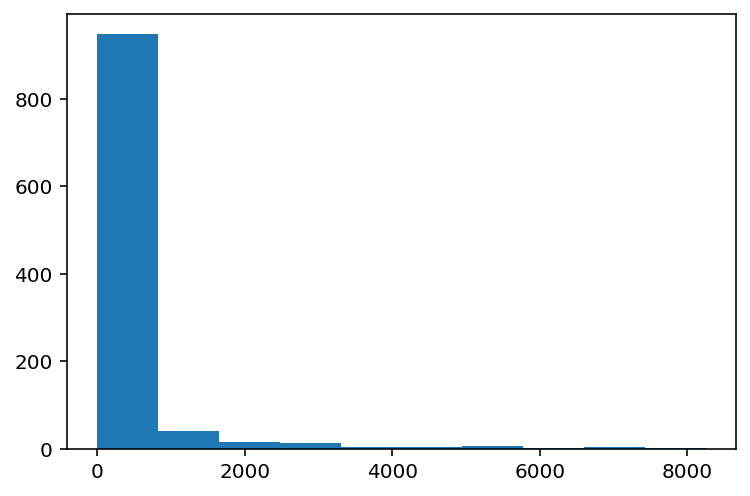

In [63]:
no = [count for _,count in freq.items()]
plt.hist(no)

We can see that most of the notes have a very low frequency.